### AtliQo Bank Credit Card Launch

## Phase 1

Objective: The primary goal is to analyze customer transactions and credit profiles to identify a suitable target group for the new credit card launch.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import statsmodels.stats.api as sms
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Importing necessary libraries & dataset

In [7]:
df_cust = pd.read_csv('customers.csv')
df_cp = pd.read_csv('credit_profiles.csv')
df_tran = pd.read_csv('transactions.csv')
df_avg_tran = pd.read_csv('avg_transactions_after_campaign.csv')

In [8]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [9]:
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [10]:
df_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [11]:
df_avg_tran.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,251.02,401.78
1,2023-09-11,250.77,326.16
2,2023-09-12,248.81,303.92
3,2023-09-13,255.90,363.29
4,2023-09-14,255.86,317.06


In [12]:
print(f"Customers data has {df_cust.shape[0]} data points and {df_cust.shape[1]} features.")
print(f"Credit Score data has {df_cp.shape[0]} data points and {df_cp.shape[1]} features." )
print(f"Transactions data has {df_tran.shape[0]} data points and {df_tran.shape[1]} features.")
print(f"Average Transactions data has {df_avg_tran.shape[0]} data points and {df_avg_tran.shape[1]} features.")

Customers data has 1000 data points and 8 features.
Credit Score data has 1004 data points and 6 features.
Transactions data has 500000 data points and 7 features.
Average Transactions data has 62 data points and 3 features.


Explore Customers Table

In [14]:
df_cust.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

Insights :<br>
Dataset Information: df_cust

cust_id: Customer ID (unique identifier for each customer)<br>
name: Name of the customer<br>
gender: Gender of the customer (Male/Female)<br>
age: Age of the customer (in years)<br>
location: Location of the customer (City/Rural)<br>
occupation: Occupation of the customer (e.g., Business Owner, Consultant, Freelancer)<br>
annual_income: Annual income of the customer (in monetary units)<br>
marital_status: Marital status of the customer (Married/Single)<br>

Analyze Income Column<br>
Handle Null Values: Annual income

In [17]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

Insight :
50 null values in annual_income.

In [19]:
df_cust[df_cust['annual_income'].isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


Insights :<br>
Different ways to handle these null values,

Remove null values: Since there are 50 null values in a dataframe of 1000, removing the values is not recommended to avoid losing important records.
Replace them with mean or median: It is suggested to use the median in the case of income. This is because income data may contain outliers, and the median is more robust to these outliers.
Replace them with median per occupation: Occupation-wise median income can vary. It is best to use the median per occupation for replacement.

In [21]:
# Calculate the median annual income for each occupation group
occupation_wise_inc_median = df_cust.groupby('occupation')['annual_income'].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [22]:
# Replace null values in 'annual_income' with the median income for the corresponding occupation
df_cust['annual_income'] = df_cust.apply(lambda row: occupation_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'], axis = 1)

In [23]:
# Display the rows with index 1 and 29 from the DataFrame
df_cust.iloc[[1,29]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
29,30,Aditya Kulkarni,Male,31,Rural,Data Scientist,105583.0,Married


Insights : <br>
Previously records at location 1 and 29 had null annual income. Now median value per occupation is present

In [25]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='annual_income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of annual_income')

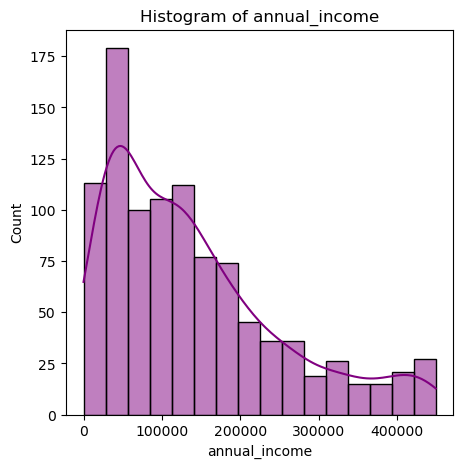

In [26]:
# Create a new figure with specified size
plt.figure(figsize=(5, 5))

# Plot a histogram of the 'annual_income' column with a Kernel Density Estimate (KDE) line
# Set the color of the histogram bars to green and add a label
sns.histplot(df_cust['annual_income'], kde=True, color='purple', label='Data')

# Set the title of the plot
plt.title('Histogram of annual_income')

# Display the plot
plt.show()

Insights : <br>
From the plot, it is evident that the annual income distribution is right-skewed.

In [28]:
# Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


Insights : <br>
The following observations can be made:

1.Age: min = 1, max = 135

2.Annual Income: min = 2, max = 449k

The age column has outliers. Annual income also seems to have outliers in terms of minimum value because the business suggested that the minimum income should be at least 100.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='annual_income'>

Text(0.5, 1.0, 'Distribution of Annual Income')

Text(0.5, 0, 'Annual Income ($)')

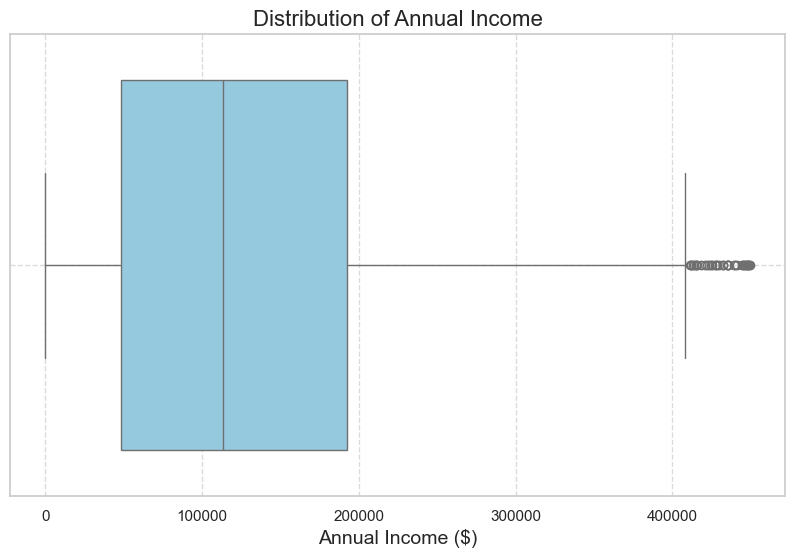

In [30]:
# Set the style and color palette for the plot
sns.set(style="whitegrid")
sns.set_palette("muted")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot a boxplot of annual income
sns.boxplot(x=df_cust['annual_income'], color='skyblue')

# Set the title and labels
plt.title('Distribution of Annual Income', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Insights : <br>
The annual income distribution has a wide range, with the majority of the data falling between 50000 and 200000.

There is a significant number of high-income outliers, which suggests a skew towards higher incomes for some individuals in the dataset.

The minimum income value is close to zero, indicating that there are individuals with very low or no reported annual income.

Outlier Detection: Annual income <br>
Standard deviation will be used to detect outliers. A common practice is to treat anything that is +/- 3 standard deviations from the mean as an outlier.

In [33]:
# Calculate the mean and standard deviation of the 'annual_income' column
df_cust['annual_income'].mean(), df_cust['annual_income'].std()

(138916.7655, 110969.40864336627)

In [34]:
# Calculate the lower bound for detecting outliers (mean - 3*std deviation)
lower = df_cust['annual_income'].mean() - 3 * df_cust['annual_income'].std()

# Calculate the upper bound for detecting outliers (mean + 3*std deviation)
upper = df_cust['annual_income'].mean() + 3 * df_cust['annual_income'].std()

# Display the lower and upper bounds
lower, upper

(-193991.46043009878, 471824.9914300988)

In [35]:
# Filter and display rows where 'annual_income' is greater than the upper bound (potential outliers)
df_cust[df_cust['annual_income']>upper]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Insights: <br>
Two outliers have been identified based on the statistical criteria of ±3 standard deviations. However, these should not always be assumed as outliers without considering business knowledge and judgment. After discussing with the business team, it was concluded that high income values for business owners are typical and should be retained to maintain accuracy in the analysis.

On the lower end, the minimum income observed is 2. According to the business manager, the income should be at least 100. This criterion will be used to identify outliers on the lower end, which could be a result of data errors.

In [37]:
# Filter and display rows where 'annual_income' is less than 100 (potential low outliers)
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


On the lower end, the minimum income is 2. The business manager has stated that the income should be at least 100. This criterion will be used to identify outliers on the lower end.

Outlier Treatment: Annual income <br>
Above records (with <100$ income) are outliers. The following options are available for treatment:

Remove them: Removing the records is not recommended as these are valid customers and should be included in the analysis.
Replace them with mean or median : Mean is sensitive to outliers. It is better to use the median for income values.
Replace them with occupation wise median: Income levels may vary based on occupation. For example, the median income for a data scientist can be different from the median income of a business owner. It is better to use occupation-wise median income for replacement.

In [40]:
# Replace annual income values less than 100 with the median income for the corresponding occupation
df_cust['annual_income'] = df_cust.apply(
    lambda x: occupation_wise_inc_median[x['occupation']] if x['annual_income'] < 100 else x['annual_income'],
    axis=1
)

In [41]:
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Insights : <br>
All annual income values less than 100 have been successfully replaced with the median income for the corresponding occupation, eliminating low outliers from the dataset.

In [43]:
# Display the rows with index 112 and 256 from the DataFrame
df_cust.loc[[112,256]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
112,113,Yash Sethi,Male,55,City,Business Owner,303207.0,Married
256,257,Rohan Sethi,Male,28,City,Freelancer,205791.0,Married


Insights : <br>
Record at 112 and 256 location had annual income of < 100$. Now you can see it is replaced by a median income per occupation

Data Visualization: Annual Income

Exploring average income level based on occupation, gender, location and marital status

In [47]:
# Calculate the average annual income for each occupation group
avg_income_per_occupation  = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [48]:
# Access the array of average annual income values for each occupation
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

In [49]:
# Access the index (occupation names) of the average annual income series
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='occupation'>

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Accountant'),
  Text(1, 0, 'Artist'),
  Text(2, 0, 'Business Owner'),
  Text(3, 0, 'Consultant'),
  Text(4, 0, 'Data Scientist'),
  Text(5, 0, 'Freelancer'),
  Text(6, 0, 'Fullstack Developer')])

Text(0.5, 1.0, 'Average Annual Income Per Occupation')

Text(0.5, 0, 'Occupation')

Text(0, 0.5, 'Average Annual Income ($)')

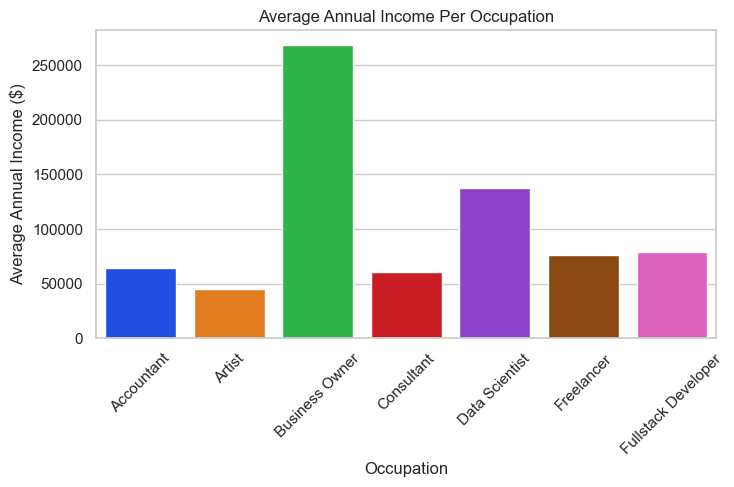

In [50]:
# Create a new figure with specified size
plt.figure(figsize=(8, 4))

# Plot a bar chart of average annual income per occupation
# Set the x-axis to occupation names and y-axis to average annual income values
# Use the 'tab10' color palette
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values, palette='bright')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title('Average Annual Income Per Occupation')

# Label the x-axis
plt.xlabel('Occupation')

# Label the y-axis
plt.ylabel('Average Annual Income ($)')

# Display the plot
plt.show()

Insights : <br>
Income Disparity: There is a notable disparity in average annual income between business owners and other occupations, highlighting the financial success of business owners.

Data Scientists: Data scientists also enjoy a relatively high average income, which may reflect the demand and value of their skills in the market.

Lower-Earning Occupations: Artists have the lowest average income, while accountants, consultants, freelancers, and fullstack developers fall in the middle range.

<Axes: xlabel='gender', ylabel='annual_income'>

Text(0.5, 1.0, 'Average Annual Income by gender')

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Average Annual Income')

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

<Axes: xlabel='location', ylabel='annual_income'>

Text(0.5, 1.0, 'Average Annual Income by location')

Text(0.5, 0, 'location')

Text(0, 0.5, 'Average Annual Income')

[Text(0, 0, 'Suburb'), Text(1, 0, 'City'), Text(2, 0, 'Rural')]

<Axes: xlabel='occupation', ylabel='annual_income'>

Text(0.5, 1.0, 'Average Annual Income by occupation')

Text(0.5, 0, 'occupation')

Text(0, 0.5, 'Average Annual Income')

[Text(0, 0, 'Business Owner'),
 Text(1, 0, 'Data Scientist'),
 Text(2, 0, 'Fullstack Developer'),
 Text(3, 0, 'Freelancer'),
 Text(4, 0, 'Accountant'),
 Text(5, 0, 'Consultant'),
 Text(6, 0, 'Artist')]

<Axes: xlabel='marital_status', ylabel='annual_income'>

Text(0.5, 1.0, 'Average Annual Income by marital_status')

Text(0.5, 0, 'marital_status')

Text(0, 0.5, 'Average Annual Income')

[Text(0, 0, 'Single'), Text(1, 0, 'Married')]

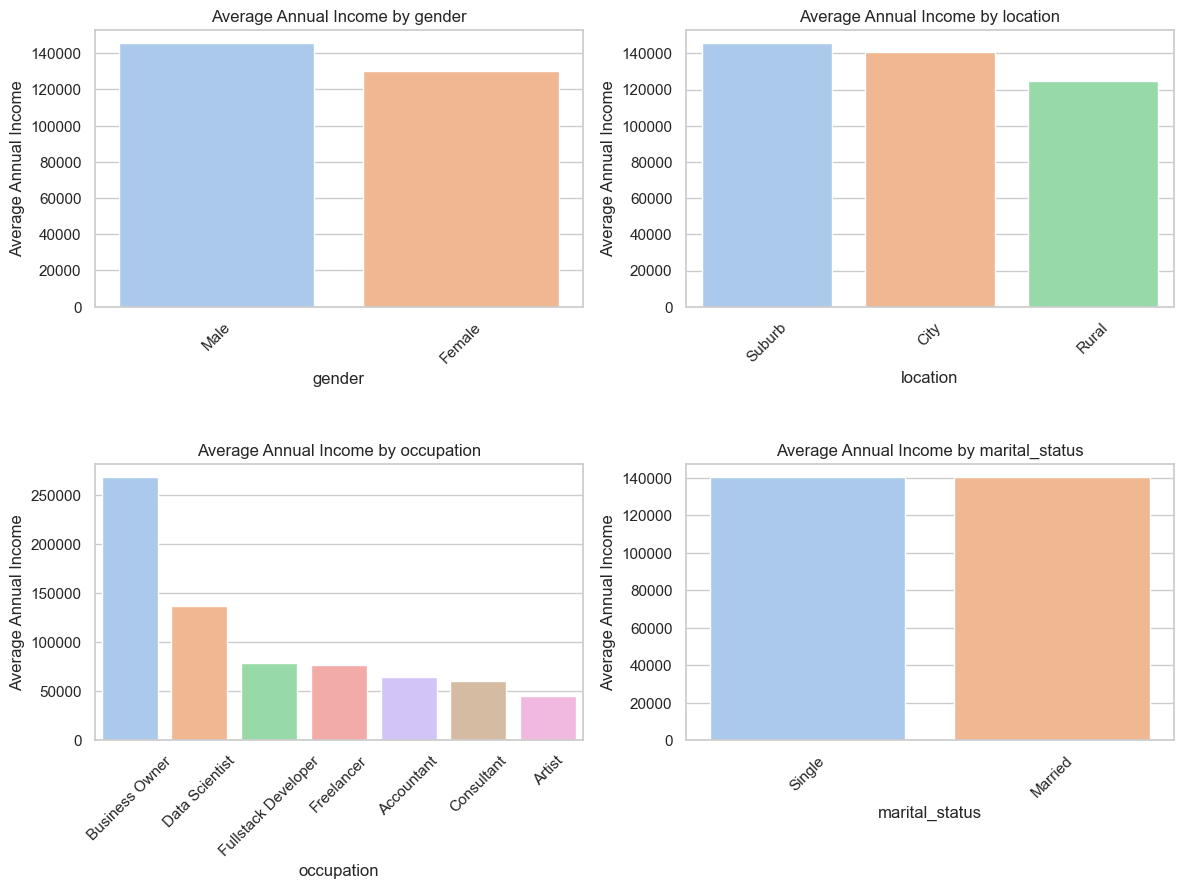

In [52]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()

    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)

    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

insights : <br>
Average Annual Income by Gender:Males have a higher average annual income compared to females.

Average Annual Income by Location:Suburb and city residents have similar average annual incomes, both higher than rural residents.

Average Annual Income by Occupation:Business owners have the highest average annual income, followed by data scientists.Other occupations like fullstack developers, freelancers, accountants, consultants, and artists have significantly lower average incomes.

Average Annual Income by Marital Status:Single and married individuals have similar average annual incomes, with no significant difference between the two groups.

Analyze Age Column<br> Handle Null Values: Age Column

In [55]:
df_cust['age'].isnull().sum()

0

In [56]:
# Generate descriptive statistics for the DataFrame, including count, mean, std, min, and quartiles
df_cust['age'].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of age')

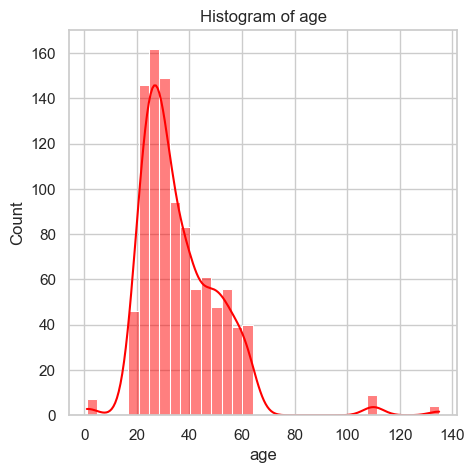

In [57]:
# Create a new figure with specified size
plt.figure(figsize=(5, 5))

# Plot a histogram of the 'age' column with a Kernel Density Estimate (KDE) line
sns.histplot(df_cust['age'], kde=True, color='red', label='Data')

# Set the title of the plot
plt.title('Histogram of age')

# Display the plot
plt.show()

Insights : <br>
From the plot, it is evident that the age distribution is right-skewed.

Outlier Treatment: Age <br>
The minimum age is 1 and the maximum age is 135, which seem to be outliers. To address this, the age distribution will be examined.

In [60]:
# Calculate the minimum age and maximum age in the 'age' column
min_age = df_cust['age'].min()
max_age = df_cust['age'].max()

# Display the minimum and maximum age values
min_age, max_age

(1, 135)

(array([  7.,   0.,  87., 225., 246., 143.,  79.,  95.,  80.,  25.,   0.,
          0.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,   4.]),
 array([  1. ,   7.7,  14.4,  21.1,  27.8,  34.5,  41.2,  47.9,  54.6,
         61.3,  68. ,  74.7,  81.4,  88.1,  94.8, 101.5, 108.2, 114.9,
        121.6, 128.3, 135. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Customer Age Distribution')

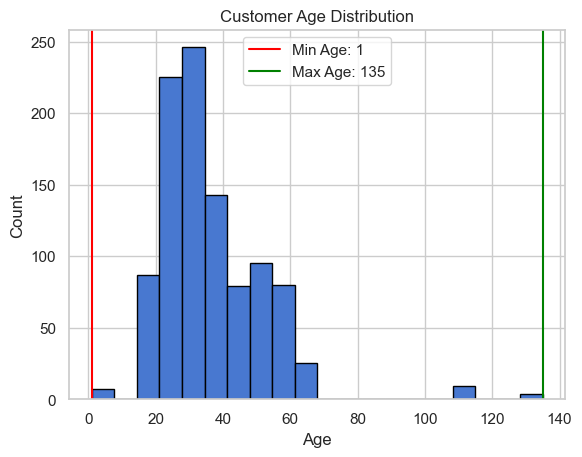

In [61]:
# Plot a histogram of the 'age' column with 20 bins and black edges for the bars
plt.hist(df_cust['age'], bins=20, edgecolor='black')

# Label the x-axis as "Age"
plt.xlabel("Age")

# Label the y-axis as "Count"
plt.ylabel("Count")

# Set the title of the plot as "Customer Age Distribution"
plt.title("Customer Age Distribution")

# Add a vertical line at the minimum age, colored red, with a label showing the min age
plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")

# Add a vertical line at the maximum age, colored green, with a label showing the max age
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

In [62]:
# Filter and display rows where 'age' is less than 15 or greater than 80 (potential outliers)
df_cust[(df_cust['age']<15)|(df_cust['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [63]:
# Filter rows where 'age' is less than 15 or greater than 80 (potential outliers) and assign to 'outliers'
outliers = df_cust[(df_cust['age'] < 15) | (df_cust['age'] > 80)]

# Display the shape of the 'outliers' DataFrame (number of rows and columns)
outliers.shape

(20, 8)

Calculate median per occupation and then use that for replacing outliers

In [65]:
# Calculate the median age for each occupation group
median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [66]:
# Define a function to replace the age based on occupation
def replace_age(row):
    if pd.notnull(row['age']):  # Check if age is not null
        # Get the occupation for the given index in df_cust and replace age with median if needed
        occupation = df_cust.loc[row.name, 'occupation']
        df_cust.loc[row.name, 'age'] = median_age_per_occupation[occupation]

# Apply the function to each row in the outliers DataFrame
outliers.apply(lambda row: replace_age(row), axis=1)

0      None
41     None
165    None
174    None
222    None
277    None
295    None
325    None
610    None
692    None
703    None
709    None
728    None
832    None
845    None
855    None
895    None
923    None
951    None
991    None
dtype: object

In [67]:
# Filter and display rows where 'age' is less than 15 or greater than 80 (potential outliers)
df_cust[(df_cust['age'] < 15) | (df_cust['age'] > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [68]:
df_cust['age'].describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

Insights : <br>
Don't have any outliers left. min age is 18 and max is 64.

Data Visualization: Age Column

In [71]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

0      49-65
1      26-48
2      18-25
3      18-25
4      26-48
       ...  
995    26-48
996    49-65
997    26-48
998    26-48
999    26-48
Name: age, Length: 1000, dtype: category
Categories (3, object): ['18-25' < '26-48' < '49-65']

In [72]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [73]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [74]:
# Calculate the percentage distribution of each 'age_group' in the 'df_cust' DataFrame
age_group_distribution = df_cust['age_group'].value_counts(normalize=True) * 100
# Display the resulting distribution
print(age_group_distribution)

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64


<Figure size 400x400 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1f524c107a0>,
 [Text(-0.5622559171629351, -1.0601265413219627, '26-48'),
  Text(0.9676133155300692, 0.5231868419684375, '18-25'),
  Text(-0.3094706572091483, 1.055569946676457, '49-65')],
 [Text(-0.32798261834504544, -0.6184071491044781, '56.7%'),
  Text(0.5277890811982195, 0.28537464107369315, '24.6%'),
  Text(-0.1688021766595354, 0.5757654254598855, '18.7%')])

(-1.1491954132850186,
 1.1023210951121138,
 -1.1927607787946486,
 1.104411880105313)

Text(0.5, 1.0, 'Distribution of Age Groups')

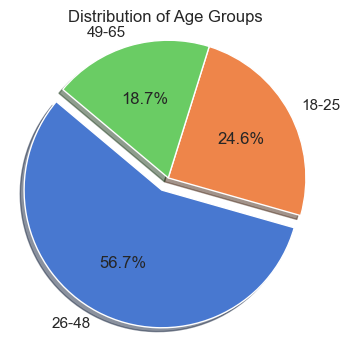

In [75]:
# Plot the pie chart
plt.figure(figsize=(4, 4))  # Set the figure size to 4x4 inches
plt.pie(
    age_group_distribution,  # The data to be plotted, should be a sequence of numbers
    labels=age_group_distribution.index,  # Labels corresponding to each slice
    explode=(0.1, 0, 0),  # Explode the first slice (offset it from the center)
    autopct='%1.1f%%',  # Format to display the percentage value on each slice
    shadow=True,  # Add a shadow to the pie chart
    startangle=140  # Start angle for the first slice
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Age Groups')  # Title of the pie chart
plt.show()  # Display the pie chart

Insights: <br>
More than 50% of customer base are in in age group of 26 - 48 adn ~26% are of age group 18 - 25

3. Analyze Gender and Location Distribution

<Axes: xlabel='location'>

Text(0.5, 0, 'Location')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Customer Distribution by Location and Gender')

(array([0, 1, 2]),
 [Text(0, 0, 'City'), Text(1, 0, 'Rural'), Text(2, 0, 'Suburb')])

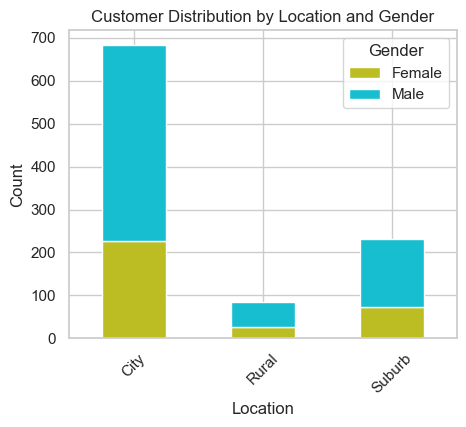

In [78]:
# Group the data by 'location' and 'gender', count the occurrences, and reshape the data
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution of customers by location and gender
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4),color=['#bcbd22', '#17becf'])

# Add labels and title
plt.xlabel('Location')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Customer Distribution by Location and Gender')  # Title of the chart

# Add a legend
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Display the bar chart
plt.show()

Explore Credit Score Table

In [80]:
df_cp.columns

Index(['cust_id', 'credit_score', 'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit'],
      dtype='object')

Insights : <br>
Dataset Information: df_cp

cust_id: Customer ID (unique identifier for each customer)

credit_score: Credit score of the customer

credit_utilisation: Credit utilization ratio of the customer

outstanding_debt: Outstanding debt of the customer (in monetary units)

credit_inquiries_last_6_months: Number of credit inquiries in the last 6 months

credit_limit: Credit limit of the customer (in monetary units)

Remove Duplicates

In [83]:
df_cp.shape

(1004, 6)

Insights: <br>
There are 1004 rows in this dataframe whereas customers dataframe had only 1000. There might be invalid or duplicate data in df_cp

In [85]:
# Calculate the number of unique customer IDs in the df_cp DataFrame
df_cp['cust_id'].nunique()

1000

In [86]:
# Find all rows in the df_cp DataFrame that have duplicated customer IDs
df_cp[df_cp.duplicated('cust_id', keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [87]:
# Remove duplicate rows based on the 'cust_id' column, keeping the last occurrence of each duplicate
df_cs_rm_dup= df_cp.drop_duplicates(subset='cust_id', keep="last")

# Display the shape of the cleaned DataFrame (number of rows and columns)
df_cs_rm_dup.shape

(1000, 6)

In [88]:
df_cs_rm_dup[df_cs_rm_dup.duplicated('cust_id', keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


Insights : <br>
df_cs_rm_dup looks clean now after cleaning duplicates.

Handle Null Values

In [91]:
df_cs_rm_dup.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

Insights: <br>
The credit_limit column contains many null values. Business knowledge suggests that the credit limit depends on the customer's credit score. To address this, determine if a mathematical relationship exists between the credit score and credit limit. If so, use the credit score to fill the null values in the credit limit.

In [93]:
# Filter the DataFrame to include only rows where the credit_limit column has null values
df_cs_rm_dup[df_cs_rm_dup.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [94]:
df_cs_rm_dup['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

Insights: <br>
Credit limit has only few unique values.

In [96]:
# Count the occurrences of each unique value in the credit_limit column
df_cs_rm_dup['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

<Figure size 2000x500 with 0 Axes>

Text(0.5, 1.0, 'Credit Score vs. Credit Limit')

Text(0.5, 0, 'Credit Limit')

Text(0, 0.5, 'Credit Score')

([<matplotlib.axis.XTick at 0x1f52931ca10>,
 [Text(0, 0, '0'),
  Text(5000, 0, '5000'),
  Text(10000, 0, '10000'),
  Text(15000, 0, '15000'),
  Text(20000, 0, '20000'),
  Text(25000, 0, '25000'),
  Text(30000, 0, '30000'),
  Text(35000, 0, '35000'),
  Text(40000, 0, '40000'),
  Text(45000, 0, '45000'),
  Text(50000, 0, '50000'),
  Text(55000, 0, '55000'),
  Text(60000, 0, '60000'),
  Text(65000, 0, '65000'),
  Text(70000, 0, '70000'),
  Text(75000, 0, '75000'),
  Text(80000, 0, '80000'),
  Text(85000, 0, '85000'),
  Text(90000, 0, '90000')])

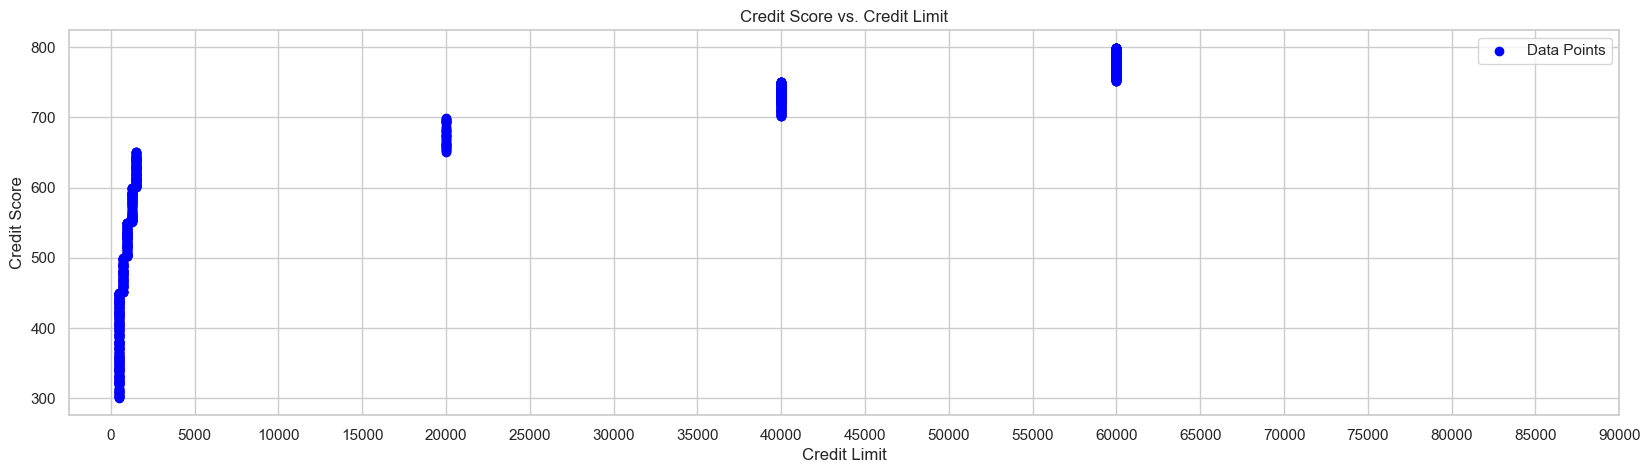

In [97]:
# Looking at scatter plot for credit score vs credit_limit again (after handling oultiers)
# Create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(df_cs_rm_dup['credit_limit'], df_cs_rm_dup['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

# Adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001, 5000))
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

Insights: <br>
Credit Score up to 650: Customers with a credit score up to 650 generally receive a very low credit limit, often less than $1,000.

Credit Score between 650 and 700: Customers with credit scores in this range tend to have a credit limit around $20,000.

Credit Score between 700 and 750: Customers with scores in this range typically receive a credit limit around $40,000.

Credit Score above 750: Higher scores tend to correspond with even higher credit limits, sometimes exceeding $60,000.

This pattern suggests that the credit limit increases in steps with the credit score, indicating a tiered approach to assigning credit limits based on credit scores. This insight can be used to fill in the missing credit_limit values based on the corresponding credit_score.

In [99]:
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_cs_rm_dup['credit_score_range'] = pd.cut(df_cs_rm_dup['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [100]:
df_cs_rm_dup.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [101]:
df_cs_rm_dup[['credit_score','credit_score_range', 'credit_limit']].head()

,credit_score,credit_score_range,credit_limit
0,749,700-749,40000.0
1,587,550-599,1250.0
2,544,500-549,1000.0
3,504,500-549,1000.0
4,708,700-749,40000.0


In [102]:
df_cs_rm_dup[df_cs_rm_dup['credit_score_range']=="750-799"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
21,22,785,0.897089,36083.0,3.0,60000.0,750-799
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
26,27,766,0.830908,31344.0,3.0,60000.0,750-799
29,30,798,0.222597,7238.0,2.0,60000.0,750-799
31,32,768,0.747793,35109.0,2.0,60000.0,750-799
...,...,...,...,...,...,...,...
988,985,770,0.628088,33405.0,2.0,60000.0,750-799
993,990,772,0.259958,11937.0,2.0,60000.0,750-799
996,993,782,0.477170,20305.0,2.0,60000.0,750-799
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799


In [103]:
df_cs_rm_dup[df_cs_rm_dup['credit_score_range']=="300-449"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
5,6,442,0.705409,246.0,4.0,500.0,300-449
11,12,429,0.627645,263.0,0.0,500.0,300-449
15,16,347,0.531660,190.0,0.0,500.0,300-449
18,19,447,0.795650,292.0,1.0,500.0,300-449
20,21,381,0.714710,307.0,0.0,500.0,300-449
...,...,...,...,...,...,...,...
981,978,371,0.435307,183.0,2.0,500.0,300-449
982,979,332,0.150815,65.0,1.0,500.0,300-449
984,981,327,0.377202,108.0,3.0,500.0,300-449
989,986,425,0.178470,56.0,4.0,500.0,300-449


Insights : <br>
For credit score range "750-799" the credit limit is 60K whereas for "300-449" it is 500.Use MODE function to find out most frequently occuring credit limit for a given score range.

In [105]:
# Calculate the mode (most frequent value) of the credit_limit for each credit_score_range group and create a new DataFrame with the results
mode_df = df_cs_rm_dup.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [106]:
# Randomly select 3 samples from the rows where the credit_limit column has null values
df_cs_rm_dup[df_cs_rm_dup.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
931,928,311,0.832244,316.0,2.0,NaN,300-449
912,909,479,0.487555,320.0,3.0,NaN,450-499
258,259,427,0.339428,136.0,4.0,NaN,300-449


In [107]:
# Merge the mode values back with the original DataFrame
df_cs_clean = pd.merge(df_cs_rm_dup, mode_df, on='credit_score_range', suffixes=('', '_mode'))
df_cs_clean.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
108,109,755,0.544536,26511.0,3.0,60000.0,750-799,60000.0
180,181,752,0.695025,36093.0,3.0,60000.0,750-799,60000.0
306,307,304,0.254547,74.0,4.0,NaN,300-449,500.0


In [108]:
df_cs_clean[df_cs_clean['credit_limit'].isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
852,853,497,0.873269,416.0,3.0,NaN,450-499,750.0
274,275,798,0.491995,19365.0,4.0,NaN,750-799,60000.0
72,73,323,0.858835,216.0,1.0,NaN,300-449,500.0


Insights: <br>
The NaN values in the credit_limit column can be replaced with the credit_limit_mode value, which indicates the most frequently occurring credit limit for a given credit_score_range. This value can serve as a replacement.

In [110]:
# Create a copy of the original DataFrame to ensure reproducibility and retain the original data
df_cs_clean_new = df_cs_clean.copy()

# Replace NaN values in the credit_limit column with the corresponding credit_limit_mode values
df_cs_clean_new['credit_limit'].fillna(df_cs_clean_new['credit_limit_mode'], inplace=True)

# Display the shape of the new cleaned DataFrame (number of rows and columns)
df_cs_clean_new.shape

(1000, 8)

In [111]:
# Count the number of null values in each column of the new cleaned DataFrame
df_cs_clean_new.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [112]:
df_cs_clean_new[df_cs_clean_new['cust_id']==117]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
116,117,372,0.604427,252.0,4.0,500.0,300-449,500.0


Insights: <br>
Previously customer id 117 had null value in credit_limit. Now it has a valid value.

Handle Outliers: outstanding_debt

In [115]:
df_cs_clean_new.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


Insights: <br>
Observing the minimum and maximum values for various columns reveals that the maximum value of outstanding_debt is greater than the maximum value of credit_limit. Based on business understanding, the maximum debt a customer can have is equal to the credit limit, as spending beyond the credit limit is not allowed.

Visualizing outliers

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='outstanding_debt'>

Text(0.5, 1.0, 'Box plot for Outstanding Debt')

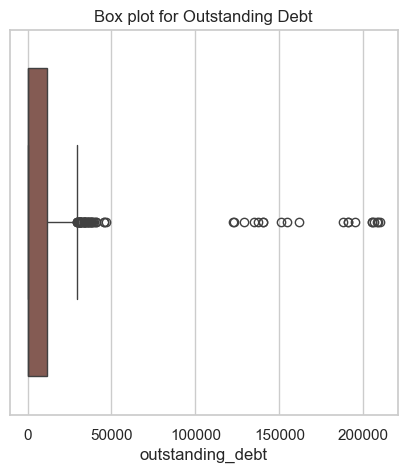

In [118]:
# Create a figure with specific size
plt.figure(figsize=(5, 5))

# Create a box plot for the outstanding_debt column with a different color
sns.boxplot(x=df_cs_clean_new['outstanding_debt'], color='#8c564b')

# Add a title to the plot
plt.title('Box plot for Outstanding Debt')

# Display the plot
plt.show()

Insights : <br>
Concentration of Values: Most of the outstanding_debt values are concentrated below 50,000.

Outliers: There are several outliers with debts ranging from just above 50,000 to over 200,000, indicating that a small number of customers have exceptionally high outstanding debts.

Distribution: The box plot shows that the majority of customers have relatively low outstanding debts, with the interquartile range (IQR) and whiskers showing the spread of the bulk of the data.

This visualization helps identify the typical range of outstanding debts and highlights the presence of significant outliers in the dataset.Instead of using any statistical approach (such as standard deviation or IQR),using business knowledge, any outstanding debt greater than the credit limit will be marked as an outlier.

In [120]:
# Filter the DataFrame to include only rows where the outstanding_debt is greater than the credit_limit
df_cs_clean_new[df_cs_clean_new['outstanding_debt']>df_cs_clean_new['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


Insights : <br>
The outliers will be replaced with the credit_limit. It can be assumed that there was a data processing error leading to these high numbers, and it is acceptable to replace them with the credit_limit.

In [122]:
df_cs_clean_new.loc[df_cs_clean_new['outstanding_debt'] > df_cs_clean_new['credit_limit'], 'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [123]:
df_cs_clean_new.loc[df_cs_clean_new['outstanding_debt'] > df_cs_clean_new['credit_limit'], 'outstanding_debt'] = df_cs_clean_new['credit_limit']

In [124]:
df_cs_clean_new[df_cs_clean_new['outstanding_debt']>df_cs_clean_new['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


Insights: <br>
All outliers in column outstanding_debt are removed.

Visualizing Correlation in Credit Score Table

In [127]:
# Merge the df_cust DataFrame with the df_cs_clean_new DataFrame on the 'cust_id' column using an inner join
df_merged = df_cust.merge(df_cs_clean_new, on='cust_id', how='inner')


df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [128]:
# List of numerical columns to include in the correlation matrix
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income', 'age']

# Calculate the correlation matrix for the selected numerical columns
correlation_matrix = df_merged[numerical_cols].corr()

# Display the correlation matrix
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Plot')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'credit_score'),
  Text(1.5, 0, 'credit_utilisation'),
  Text(2.5, 0, 'outstanding_debt'),
  Text(3.5, 0, 'credit_limit'),
  Text(4.5, 0, 'annual_income'),
  Text(5.5, 0, 'age')])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'credit_score'),
  Text(0, 1.5, 'credit_utilisation'),
  Text(0, 2.5, 'outstanding_debt'),
  Text(0, 3.5, 'credit_limit'),
  Text(0, 4.5, 'annual_income'),
  Text(0, 5.5, 'age')])

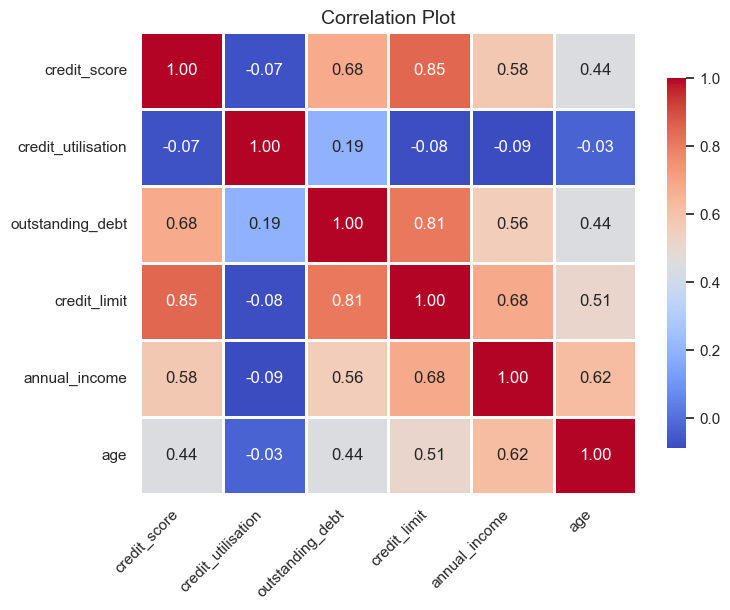

In [129]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8, cbar_kws={'shrink': 0.8})
plt.title('Correlation Plot', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Insights: <br>
Credit Score and Credit Limit: There is a strong positive correlation (0.85) between credit score and credit limit, indicating that higher credit scores are associated with higher credit limits.

Outstanding Debt and Credit Limit: A high positive correlation (0.81) between outstanding debt and credit limit suggests that customers with higher credit limits tend to have higher outstanding debts.

Credit Score and Outstanding Debt: There is a moderate positive correlation (0.68) between credit score and outstanding debt, implying that customers with higher credit scores also tend to have higher outstanding debts.

Annual Income and Age: A moderate positive correlation (0.62) between annual income and age indicates that older customers tend to have higher annual incomes.

Credit Score and Annual Income: There is a moderate positive correlation (0.58) between credit score and annual income, suggesting that customers with higher incomes tend to have higher credit scores.

Credit Utilization: Credit utilization has weak correlations with other variables, indicating it varies independently of the other factors in this dataset.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='annual_income', ylabel='credit_score'>

Text(0.5, 1.0, 'Scatter Plot of Annual Income vs. Credit Score')

Text(0.5, 0, 'Annual Income')

Text(0, 0.5, 'Credit Score')

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000')])

(array([200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

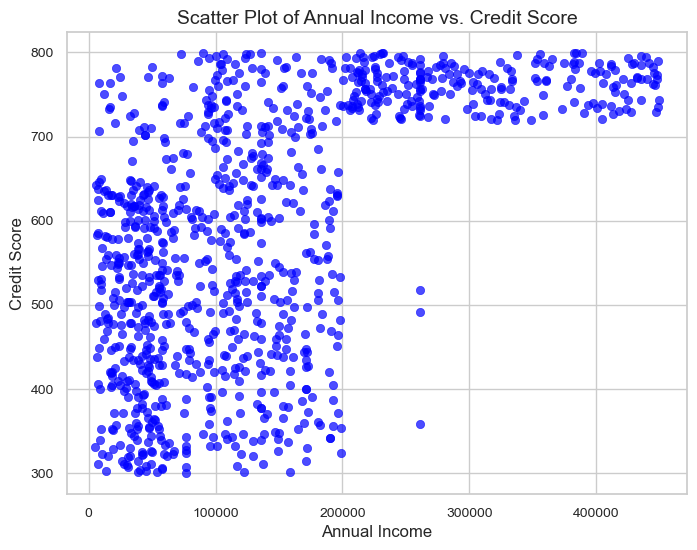

In [131]:
# Create a scatter plot of annual_income vs. credit_score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='annual_income', y='credit_score', data=df_merged, alpha=0.7, color='blue', edgecolor=None)

# Add title and labels with improved styling
plt.title('Scatter Plot of Annual Income vs. Credit Score', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)

# Improve the readability of the plot
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Insights : <br>
These insights suggest a correlation between higher annual incomes and better credit scores, but the relationship is not strictly linear, as seen from the spread of credit scores within the lower income ranges.

Explore Transactions Table

In [134]:
df_tran.columns

Index(['tran_id', 'cust_id', 'tran_date', 'tran_amount', 'platform',
       'product_category', 'payment_type'],
      dtype='object')

Insights : <br>
Dataset Information: df_trans

tran_id: Transaction ID (unique identifier for each transaction)

cust_id: Customer ID (identifier for the customer associated with the transaction)

tran_date: Transaction date (date on which the transaction occurred)

tran_amount: Transaction amount (amount of money spent in the transaction)

platform: Platform (the platform where the transaction took place, e.g., Flipkart, Alibaba, Shopify, Amazon)

product_category: Product category (category of the product purchased, e.g., Electronics, Fashion & Apparel, Sports)

payment_type: Payment type (method of payment used for the transaction, e.g., Phonepe, Credit Card, Gpay, Net Banking)

In [136]:
df_tran.shape

(500000, 7)

In [137]:
df_tran.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [138]:
df_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [139]:
df_tran[df_tran['platform'].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='count', ylabel='product_category'>

Text(0.5, 1.0, 'Product Category Count by Platform')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Product Category')

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000')])

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Electronics'),
  Text(0, 1, 'Fashion & Apparel'),
  Text(0, 2, 'Sports'),
  Text(0, 3, 'Kitchen Appliances'),
  Text(0, 4, 'Beauty & Personal Care'),
  Text(0, 5, 'Garden & Outdoor'),
  Text(0, 6, 'Books'),
  Text(0, 7, 'Home Decor'),
  Text(0, 8, 'Toys & Games')])

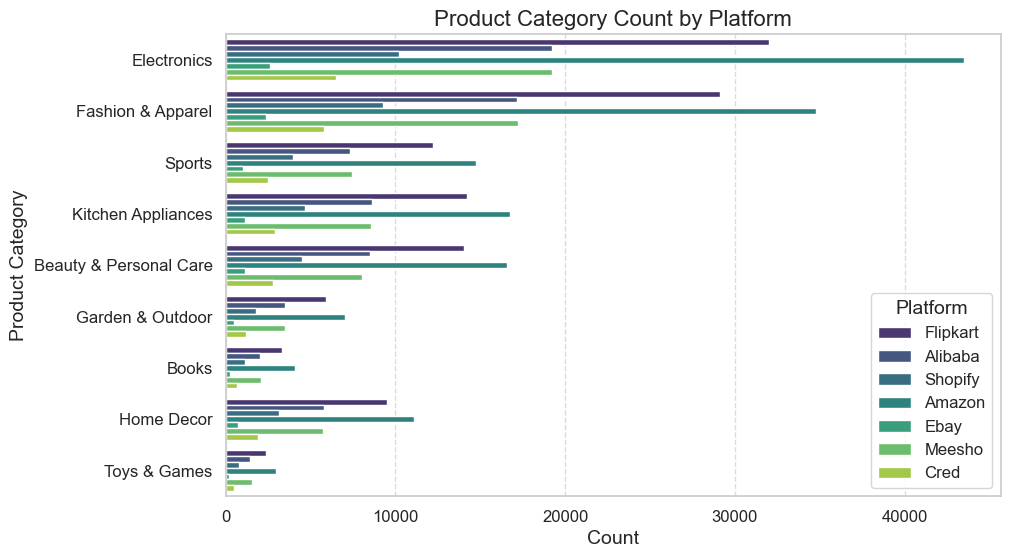

In [140]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot of product_category with a hue of platform
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', hue='platform', data=df_tran, palette='viridis')

# Add title and labels with improved styling
plt.title('Product Category Count by Platform', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Improve the readability of the plot
plt.legend(title='Platform', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


Insights : <br>
Amazon Dominance: Amazon is the most frequently used platform for purchases across all product categories. This trend is consistent and prominent in categories such as Electronics, Fashion & Apparel, and Kitchen Appliances.

Other Platforms: While Amazon leads, other platforms like Flipkart, Alibaba, and Shopify also have significant usage in various categories. For instance, Flipkart shows a considerable count in Fashion & Apparel and Kitchen Appliances, while Alibaba has notable counts in Fashion & Apparel and Beauty & Personal Care.

Category Distribution: The distribution of product categories varies across platforms, but Electronics and Fashion & Apparel are the most commonly purchased categories overall.

Handling Null Values: Given Amazon's high frequency of use across all categories, replacing null values in the platform column with "Amazon" could be a reasonable approach to handle missing data.

These insights suggest that Amazon is the preferred platform for most customers, and other platforms have a varied but smaller share of transactions across different product categories.

In [142]:
df_tran['platform'].mode()

0    Amazon
Name: platform, dtype: object

In [143]:
df_tran['platform'].mode()[0]

'Amazon'

In [144]:
# Replace null values in the platform column with the most frequently occurring value (mode)
df_tran['platform'].fillna(df_tran['platform'].mode()[0], inplace=True)

In [145]:
df_tran.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

Treat Outliers

In [147]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


Insights : <br>
Transactions with an amount of 0 seem to be invalid.

In [149]:
# Filter the DataFrame to include only rows where the transaction amount is 0
df_trans_zero = df_tran[df_tran['tran_amount'] == 0]

# Display the first 3 rows of the filtered DataFrame
df_trans_zero.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card


In [150]:
df_trans_zero.shape

(4734, 7)

In [151]:
df_trans_zero['platform'].value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [152]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

Insights: <br>
When platform=Amazon, product_category=Electronics, and payment_type=Credit Card, zero transactions appear. To address this, find other transactions in this group and use the median to replace these zero values. The mean is not used due to the presence of outliers in this column.

In [154]:
# Filter the DataFrame to include only rows where platform is 'Amazon', product_category is 'Electronics',
# and payment_type is 'Credit Card'
df_trans_fil = df_tran[(df_tran['platform'] == 'Amazon') &
                        (df_tran['product_category'] == "Electronics") &
                        (df_tran['payment_type'] == "Credit Card")]

# Display the shape of the filtered DataFrame (number of rows and columns)
df_trans_fil.shape

(15637, 7)

In [155]:
# Filter the previously filtered DataFrame to include only rows where the transaction amount is greater than 0
df_trans_fil[df_trans_fil['tran_amount']>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [156]:
# Calculate the median transaction amount for the filtered DataFrame where the transaction amount is greater than 0
median_to_replace = df_trans_fil[df_trans_fil['tran_amount']>0].tran_amount.median()
median_to_replace

554.0

In [157]:
# Replace all transaction amounts of 0 with the calculated median transaction amount
df_tran['tran_amount'].replace(0,median_to_replace, inplace=True)

In [158]:
# Filter the DataFrame to include only rows where the transaction amount is still 0 (to check if any 0 values remain)
df_tran[df_tran['tran_amount']==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [159]:
df_tran[df_tran['tran_amount']<1000].describe()

,tran_id,cust_id,tran_amount
count,475000.000000,475000.000000,475000.000000
mean,250041.699922,501.375499,240.667608
std,144285.259913,288.606185,244.487110
min,1.000000,1.000000,2.000000
25%,125126.750000,252.000000,63.000000
50%,250100.500000,502.000000,131.000000
75%,374928.250000,751.000000,348.000000
max,500000.000000,1000.000000,999.000000


In [160]:
# Calculate the 1st quartile (25th percentile) and 3rd quartile (75th percentile) of the transaction amounts
Q1, Q3 = df_tran['tran_amount'].quantile([0.25, 0.75])

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower bound for outliers
lower = Q1 - 2 * IQR

# Calculate the upper bound for outliers
upper = Q3 + 2 * IQR

# Display the lower and upper bounds
lower, upper

(-628.0, 1107.0)

In [161]:
df_tran[df_tran['tran_amount']<upper].tran_amount.max()

999

In [162]:
df_tran[df_tran['tran_amount']>upper].tran_amount.min()

50000

In [163]:
# Filter the DataFrame to include only rows where the transaction amount is greater than or equal to the upper bound for outliers
df_trans_outliers = df_tran[df_tran['tran_amount'] >= upper]

# Display the filtered DataFrame with outliers
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [164]:
# Filter the DataFrame to include only rows where the transaction amount is less than the upper bound for outliers
df_trans_normal = df_tran[df_tran['tran_amount'] < upper]

# Display the filtered DataFrame with normal transaction amounts
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [165]:
# Calculate the mean transaction amount for each product category in the filtered DataFrame with normal transaction amounts
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()

# Display the mean transaction amount per product category
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [166]:
# Select the rows in the original DataFrame corresponding to the indices of the outliers
df_tran.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [167]:
# Replace the transaction amounts for outliers with the mean transaction amount of their respective product category
df_tran.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [168]:
# Select the rows in the original DataFrame corresponding to the indices of the outliers to verify the replacement
df_tran.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


Insights : <br>
Remove outliers from the tran_amount column.

<Axes: xlabel='tran_amount', ylabel='Count'>

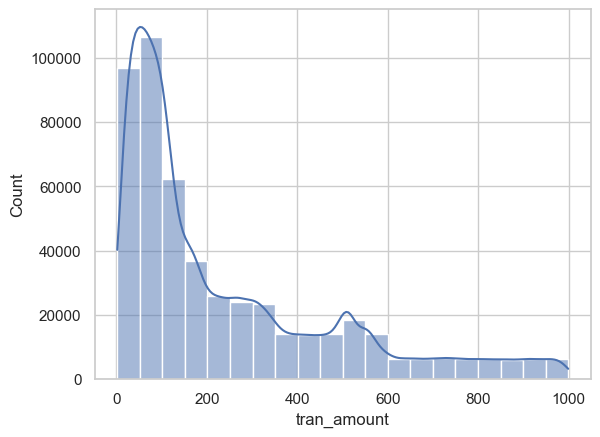

In [170]:
sns.histplot(x='tran_amount', data=df_tran, bins=20, kde=True)

Insights: <br>
Right-Skewed Distribution: The distribution of transaction amounts is right-skewed, with the majority of transactions being of smaller amounts.

High Frequency of Small Transactions: The highest frequency of transactions is within the lower range, particularly between 0 and 100.

Gradual Decline: There is a gradual decline in the number of transactions as the transaction amount increases.

Few High-Value Transactions: There are fewer high-value transactions, with the count significantly decreasing as the transaction amount approaches 1000.

Data Visualization

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='payment_type', ylabel='count'>

Text(0.5, 1.0, 'Payment Type Distribution')

Text(0.5, 0, 'Payment Type')

Text(0, 0.5, 'Percentage')

Text(0, 10, '28.8%')

Text(0, 10, '28.0%')

Text(0, 10, '21.8%')

Text(0, 10, '11.9%')

Text(0, 10, '8.6%')

Text(0, 10, '0.8%')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Phonepe'),
  Text(1, 0, 'Credit Card'),
  Text(2, 0, 'Gpay'),
  Text(3, 0, 'Debit Card'),
  Text(4, 0, 'Net Banking'),
  Text(5, 0, 'Cash')])

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000'),
  Text(0, 160000.0, '160000')])

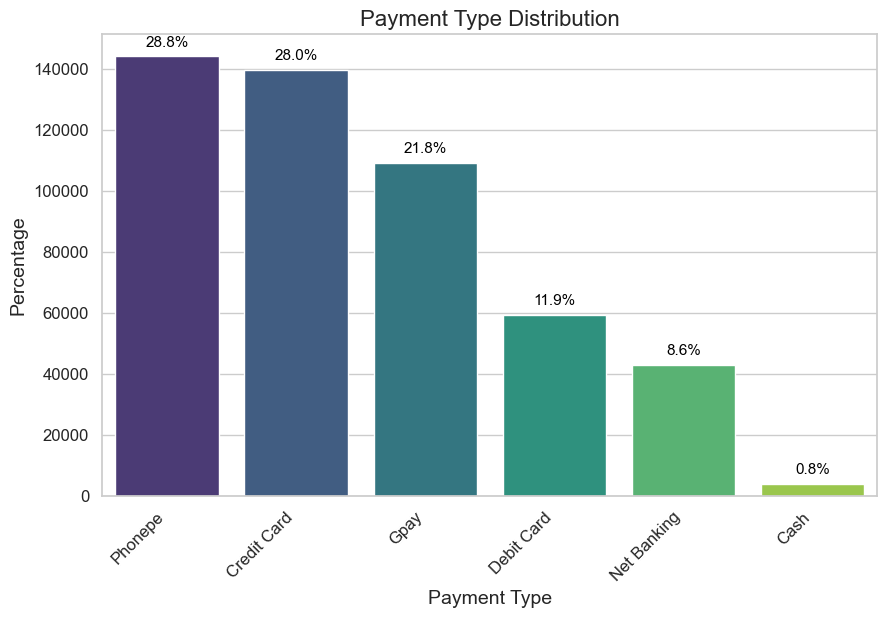

In [173]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot of payment_type showing percentages
plt.figure(figsize=(10, 6))
sns.countplot(x=df_tran['payment_type'], palette='viridis', order=df_tran['payment_type'].value_counts().index)

# Add title and labels with improved styling
plt.title('Payment Type Distribution', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Calculate the percentages and annotate the bars
total = len(df_tran)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')

# Improve the readability of the plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Insights : <br>
Phonepe and Credit Card: These are the most commonly used payment methods, each accounting for a significant portion of transactions (28.8% and 28.0%, respectively).

Gpay: This is also a popular payment method, making up 21.8% of the transactions.

Debit Card and Net Banking: These payment methods are used less frequently, with Debit Cards accounting for 11.9% and Net Banking for 8.6% of transactions.

Cash: This is the least used payment method, representing only 0.8% of transactions.

The plot indicates a strong preference for digital payment methods, with Phonepe, Credit Card, and Gpay collectively making up a significant majority of the transactions.

Distribution of payment types across age groups

In [176]:
# Merge the df_merged DataFrame with the df_trans DataFrame on the 'cust_id' column using an inner join
df_merged_2 = df_merged.merge(df_tran, on='cust_id', how='inner')

# Display the first 3 rows of the merged DataFrame
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


In [177]:
df_merged_2.shape

(500000, 22)

<Figure size 500x400 with 0 Axes>

<Axes: xlabel='age_group', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Payment types across Age groups')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

([0, 1, 2], [Text(0, 0, '18-25'), Text(1, 0, '26-48'), Text(2, 0, '49-65')])

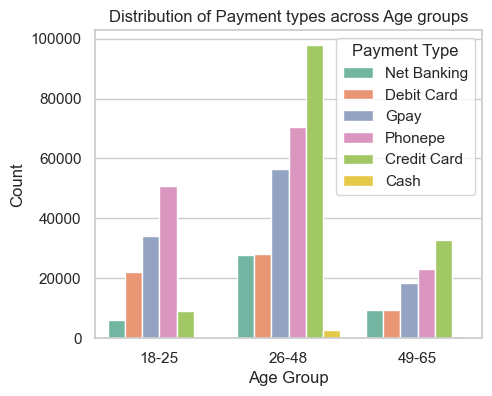

In [178]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set2')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

Insights : <br>
The distribution of payment types across age groups shows the following insights:

26-48 Age Group: This age group has the highest number of transactions across all payment types, with Credit Card being the most used method.

18-25 Age Group: This group primarily uses Phonepe and Gpay, indicating a preference for digital payment methods.

49-65 Age Group: Credit Card is also the most used payment method in this age group, followed by Gpay and Phonepe.

Overall, digital payment methods like Phonepe and Gpay are popular among younger age groups, while Credit Card usage is high across all age groups, particularly in the 26-48 range.Age group 18-25 has less exposure to credit cards compared to other groups

<Axes: xlabel='age_group', ylabel='count'>

Text(0.5, 1.0, 'Product Category Count By Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

<Axes: xlabel='age_group', ylabel='count'>

Text(0.5, 1.0, 'Platform Count By Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

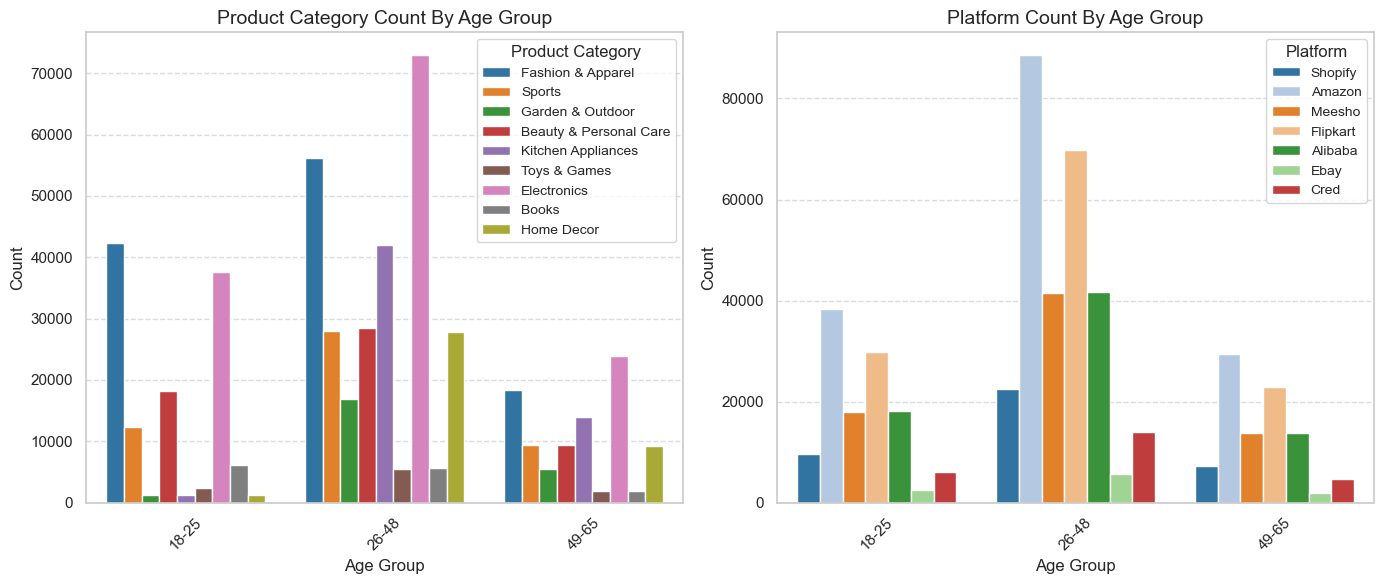

In [180]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create subplots with a specified figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the product category count by age group
sns.countplot(x='age_group', hue='product_category', data=df_merged_2, ax=ax1, palette='tab10')
ax1.set_title("Product Category Count By Age Group", fontsize=14)
ax1.set_xlabel("Age Group", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.legend(title="Product Category", loc='upper right', fontsize=10, title_fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot the platform count by age group
sns.countplot(x='age_group', hue='platform', data=df_merged_2, ax=ax2, palette='tab20')
ax2.set_title("Platform Count By Age Group", fontsize=14)
ax2.set_xlabel("Age Group", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.legend(title="Platform", loc='upper right', fontsize=10, title_fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

Insights : <br>
Top Product Categories: 18-25: Electronics, Fashion & Apparel, Beauty & Personal Care. 26-48: Electronics, Fashion & Apparel, Beauty & Personal Care. 49-65: Fashion & Apparel, Electronics, Kitchen Appliances.

Top Platforms: 18-25: Amazon, Flipkart, Gpay. 26-48: Amazon, Flipkart, Alibaba. 49-65: Amazon, Flipkart, Gpay.

Amazon dominates across all age groups, while Electronics and Fashion & Apparel are consistently popular product categories.

Data Visualization:

<Axes: xlabel='payment_type', ylabel='tran_amount'>

Text(0.5, 1.0, 'Average transaction amount by payment_type')

Text(0.5, 0, 'payment_type')

Text(0, 0.5, 'Average transaction amount')

[Text(0, 0, 'Credit Card'),
 Text(1, 0, 'Net Banking'),
 Text(2, 0, 'Gpay'),
 Text(3, 0, 'Phonepe'),
 Text(4, 0, 'Debit Card'),
 Text(5, 0, 'Cash')]

<Axes: xlabel='platform', ylabel='tran_amount'>

Text(0.5, 1.0, 'Average transaction amount by platform')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'Average transaction amount')

[Text(0, 0, 'Amazon'),
 Text(1, 0, 'Cred'),
 Text(2, 0, 'Shopify'),
 Text(3, 0, 'Meesho'),
 Text(4, 0, 'Flipkart'),
 Text(5, 0, 'Alibaba'),
 Text(6, 0, 'Ebay')]

<Axes: xlabel='product_category', ylabel='tran_amount'>

Text(0.5, 1.0, 'Average transaction amount by product_category')

Text(0.5, 0, 'product_category')

Text(0, 0.5, 'Average transaction amount')

[Text(0, 0, 'Electronics'),
 Text(1, 0, 'Home Decor'),
 Text(2, 0, 'Sports'),
 Text(3, 0, 'Kitchen Appliances'),
 Text(4, 0, 'Garden & Outdoor'),
 Text(5, 0, 'Beauty & Personal Care'),
 Text(6, 0, 'Fashion & Apparel'),
 Text(7, 0, 'Toys & Games'),
 Text(8, 0, 'Books')]

<Axes: xlabel='marital_status', ylabel='tran_amount'>

Text(0.5, 1.0, 'Average transaction amount by marital_status')

Text(0.5, 0, 'marital_status')

Text(0, 0.5, 'Average transaction amount')

[Text(0, 0, 'Married'), Text(1, 0, 'Single')]

<Axes: xlabel='age_group', ylabel='tran_amount'>

Text(0.5, 1.0, 'Average transaction amount by age_group')

Text(0.5, 0, 'age_group')

Text(0, 0.5, 'Average transaction amount')

[Text(0, 0, '18-25'), Text(1, 0, '26-48'), Text(2, 0, '49-65')]

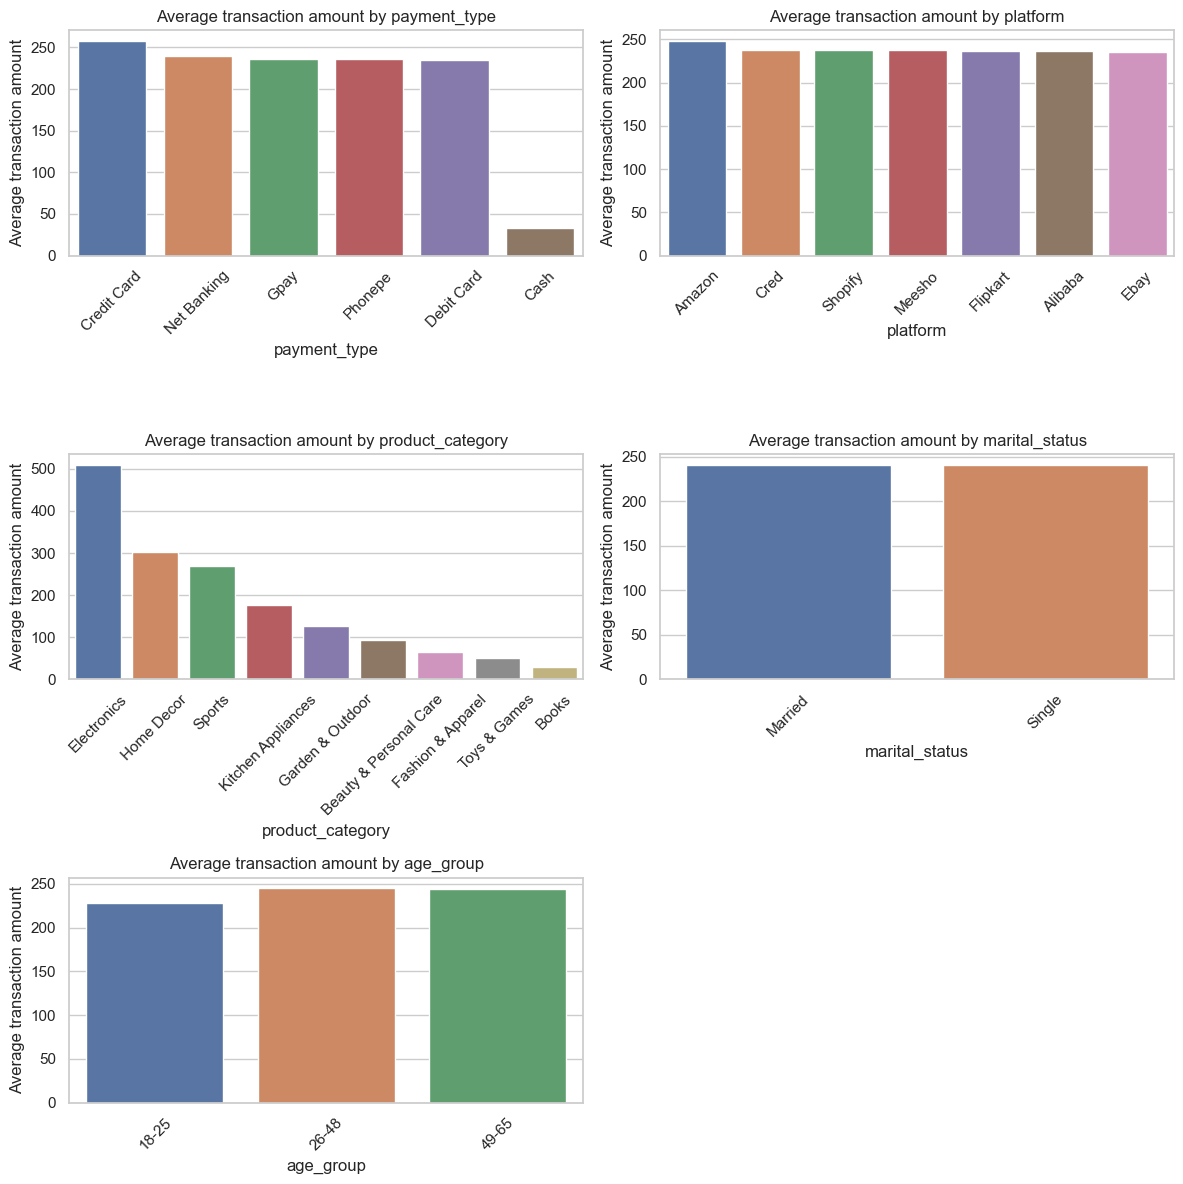

In [183]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()

    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)

    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='deep')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

Further Analysis On Age Group

In [185]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


<Axes: xlabel='age_group', ylabel='annual_income'>

Text(0.5, 1.0, 'Average Annual Income by Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Average Annual Income')

<Axes: xlabel='age_group', ylabel='credit_limit'>

Text(0.5, 1.0, 'Average Credit Limit by Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Average Credit Limit')

<Axes: xlabel='age_group', ylabel='credit_score'>

Text(0.5, 1.0, 'Average Credit Score by Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Average Credit Score')

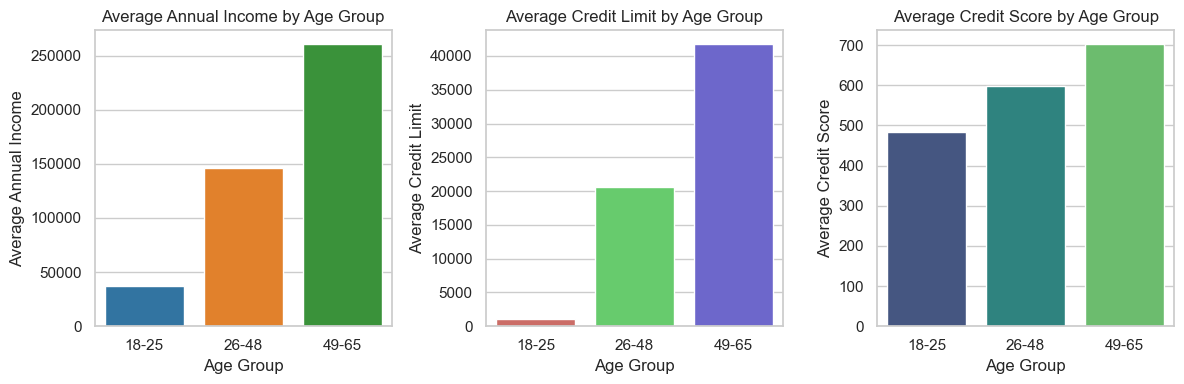

In [186]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Finalize Target Market For a Trial Credit Card Launch

Targeting Untapped market <br>
People with age group of 18 -25 accounts to ~26% of customer base in the data <br>
Avg annual income of this group is less than 50k <br>
They don't have much credit history which is getting reflected in their credit score and credit limit <br>
Usage of credit cards as payment type is relatively low compared to other groups <br>
Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care <br>

## Phase 2: AtliQ0 Bank Credit Card Project

(1) Pre-Campaign <br>
To conduct a trial run for the new credit card, it is necessary to determine the number of customers required for A/B testing. This involves forming both a control and a test group. The number of customers in each group will be based on the agreed-upon statistical power and effect size, following discussions with the business team.

In [191]:
# Define parameters for power analysis
alpha = 0.05  # 5% significance level
power = 0.8  # 80% power
effect_size = 0.2  # Effect size of 0.2

# Calculate the required sample size for each group in A/B testing
sample_size = sms.tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=1,
    alternative='two-sided'
)

sample_size

393.4056989990335

Insights : <br>
For an effect size of 0.2, 393 customers are needed. Budgeting restrictions must be considered when running this campaign. It is advisable to run the analysis for different effect sizes and discuss with the business team to determine the optimal sample size.

In [193]:
# List of effect sizes to calculate the required sample size for each
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 1]  # Standard deviations greater than the control group

# Calculate and print the required sample size for each effect size
for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")  # Print effect size and corresponding sample size

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


Insights : <br>
Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run

Approximately 246 customers within the age group of 18 to 25 have been identified. From this pool, 100 customers will be selected for the initial campaign launch.

The campaign will be launched for 100 customers, as determined by the effect size calculation and budgeting considerations, and will run for a duration of 2 months.

The campaign achieved a conversion rate of approximately 40%, meaning 40 out of 100 customers in the test group started using the credit card.

To maintain a similar sample size, a control group consisting of 40 customers will be created. This control group will be entirely separate from the initial 100 customers used in the test group.

Now, there are 40 customers in each of the control and test groups.

At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), daily data was obtained showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards, respectively.

The key performance indicator (KPI) for this A/B test aims to enhance the average transaction amounts facilitated by the new card.

(2) Post-Campaign

Two Sample Z Test for Our Hypothesis Testing

In [320]:
df_avg_tran.shape

(62, 3)

<Axes: xlabel='control_group_avg_tran', ylabel='Count'>

Text(0.5, 0, 'Sales')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Control group avg transaction amounts')

<Axes: xlabel='test_group_avg_tran', ylabel='Count'>

Text(0.5, 0, 'Sales')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of test group avg transaction amounts')

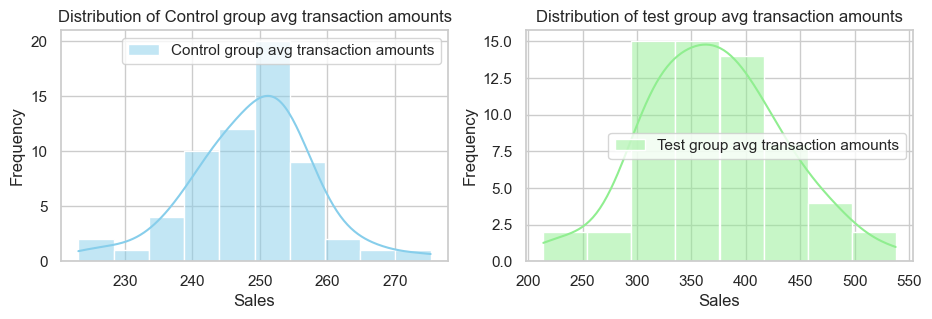

In [331]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df_avg_tran['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df_avg_tran['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

# Show the plots
plt.show()

Hypotheses:

Null Hypothesis (H0): The new credit card does not significantly increase the usage or transaction amounts compared to the existing credit card.

Alternative Hypothesis (H1): The new credit card significantly increases the usage or transaction amounts compared to the existing credit card.

Perform Hypothesis Testing Using Two Sample Z-test

In [339]:
# Calculate the mean and standard deviation of the control group's average transactions
control_mean = df_avg_tran["control_group_avg_tran"].mean()
control_std = df_avg_tran["control_group_avg_tran"].std()

# Output the calculated mean and standard deviation for the control group
control_mean, control_std

(248.94129032258064, 9.137869049553624)

In [341]:
# Calculate the mean and standard deviation of the test group's average transactions
test_mean = df_avg_tran["test_group_avg_tran"].mean()
test_std = df_avg_tran["test_group_avg_tran"].std()

# Output the calculated mean and standard deviation for the test group
test_mean, test_std

(370.5364516129033, 63.25415113953285)

In [343]:
# Calculate the sample size by getting the number of rows in the dataset
sample_size = df_avg_tran.shape[0]

# Output the sample size
sample_size

62

Test Using Rejection Region (Critical Z Value)

In [346]:
# Calculate the variance divided by the sample size for both control and test groups
a = (control_std**2 / sample_size)
b = (test_std**2 / sample_size)

# Calculate the Z-score for the difference in means between the test and control groups
Z_score = (test_mean - control_mean) / np.sqrt(a + b)

# Output the calculated Z-score
Z_score

14.980903070990523

In [348]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

1.6448536269514722

In [350]:
# Compare the calculated Z-score with the critical Z-value to determine statistical significance
Z_score > critical_z_value

True

Insights :
Since Z score is higher than critical Z value, we can reject the null hypothesis.

Test Using p-Value

In [354]:
# Calculate the p-value corresponding to z score for a right-tailed test
p_value = 1 - st.norm.cdf(Z_score)
p_value

0.0

In [356]:
p_value < alpha # p value is less than significance level of 5% (or 0.05 for absolute value)

True

Insights :
Since p value is less than significance level (alpha), we can reject the null hypothesis.

Insights :
Using Ready Made API call

The stats module from statsmodels will be used for performing a Z-test.

The order in which control and test group data are passed to sm.stats.ztest(test_data, control_data) defines the test direction and influences the results.

Passing the test group data first assumes the alternative hypothesis that the mean of the test group is greater than the mean of the control group.

Conversely, switching the order assumes the alternative hypothesis that the control group average is greater than the test group average.

The order will be sm.stats.ztest(test_group_data, control_group_data) based on the alternative hypothesis considered above.

By default, the z-test module in statsmodels performs a two-tailed test. As a one-tailed test is being performed based on the direction and alternative hypothesis, the "alternative" parameter needs to be set accordingly.

Based on the test direction, the "alternative" parameter will be set to larger.

In [360]:
# Performing Z-test with above considerations
z_statistic, p_value = sm.stats.ztest( df_avg_tran['test_group_avg_tran'],df_avg_tran['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(14.980903070990523, 4.893899020400689e-51)

Conclusions:
Therefore, based on the results of the Z-test, the null hypothesis (H0) is rejected in favor of the alternative hypothesis (H1). This indicates that the new credit card has a statistically significant positive impact on the usage or transaction amounts compared to the existing credit card.